# Übung 2
## Aufgabe 1: Canny
Implementiere den Canny-Edge-Detector, wie in der Vorlesung beschrieben. Grober Plan:

1. Bild weichzeichnen
2. Sobel-Operator anwenden
3. Non-Maximum-Suppression
4. Hysterese

### Vorvorarbeitung
Glätte das Bild mit einem Gaussian (beachte: wir werden später an den Parametern drehen). Dann erzeuge mittels Sobel-Operator die Matrizen für Gradientenmagnitude und Gradientenrichtung. Die Einträge der letzteren Matrix kannst Du hier gleich auf die 4 Richtungen (für die 8 Nachbarn) setzen. Plotte beide Zwischenergebnisse!

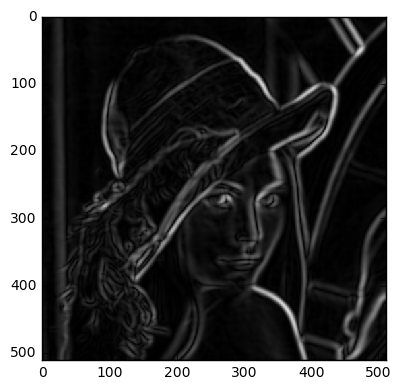

In [2]:
%matplotlib inline 
from skimage import io, color
from scipy import ndimage
import numpy as np

image = io.imread('images/lena.png')

height = len(image[0])
width = len(image[1])

# 1) Bild glätten

grayImg = color.rgb2gray(image)
gaussImg = ndimage.gaussian_filter(grayImg, 3)

# 2) Matrizen für Gradientenmagnitude und Gradientenrichtung

sobelx = np.array(([1,0,-1],
                   [2,0,-2],
                   [1,0,-1]))

sobely = np.array(([1,2,1],
                   [0,0,0],
                   [-1,-2,-1]))

sobelxImg = ndimage.convolve(gaussImg, sobelx)
sobelyImg = ndimage.convolve(gaussImg, sobely)

magnitudeImg = np.zeros((height, width))
directionImg = np.zeros((height, width), dtype='uint8')

for y in range(0, height):
    for x in range(0, width):
        gx = sobelxImg[y, x]
        gy = sobelyImg[y, x]
        
        magnitudeImg[y, x] = abs(gx) + abs(gy)
        
        angle = np.degrees(np.arctan(gx / gy)) + 90
        
        if angle <= 22.5 or angle > 157.5:
            directionImg[y, x] = 0
        elif angle > 22.5 and angle <= 67.5:
            directionImg[y, x] = 45
        elif angle > 67.5 and angle <= 112.5:
            directionImg[y, x] = 90
        else:
            directionImg[y, x] = 135

io.imshow(magnitudeImg)

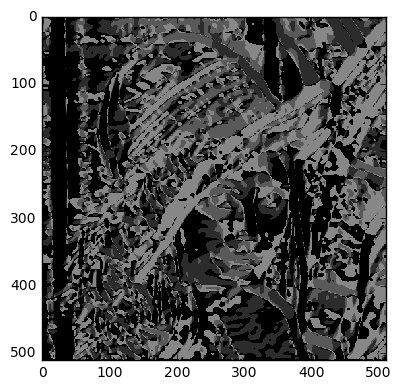

In [3]:
io.imshow(directionImg)

### Non-Maximum Suppression
Implementiere die Non-Maximum-Suppression, wie in der Vorlesung beschrieben. Ziehe das Ergebnis vom Gradientenmagnitudenbild ab und zeige das Ergebnis!

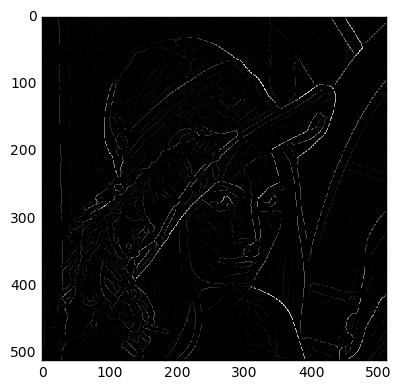

In [4]:
supress = np.zeros((height, width))

for y in range(0, height):
    for x in range(0, width):
        neighbourMagnitude1 = -1
        neighbourMagnitude2 = -1
        
        if directionImg[y, x] == 0:
            # compare left and right magnitude
            
            if x > 0:
                neighbourMagnitude1 = magnitudeImg[y, x-1]
            
            if x+1 < width:
                neighbourMagnitude2 = magnitudeImg[y, x+1]
                
        elif directionImg[y, x] == 45:
            # compare upper right and lower left magnitude
            
            if x > 0 and y+1 < height:
                neighbourMagnitude1 = magnitudeImg[y+1, x-1]
                
            if x+1 < width and y > 0:
                neighbourMagnitude2 = magnitudeImg[y-1, x+1]
            
        elif directionImg[y, x] == 90:
            # compare upper and lower magnitude
            
            if y+1 < height:
                neighbourMagnitude1 = magnitudeImg[y+1, x]
            
            if y > 0:
                neighbourMagnitude2 = magnitudeImg[y-1, x]
                
        else:
            # compare upper left and lower right magnitude
                
            if x+1 < width and y+1 < height:
                neighbourMagnitude1 = magnitudeImg[y+1, x+1]
            
            if x > 0 and y > 0:
                neighbourMagnitude2 = magnitudeImg[y-1, x-1]
                
        
        if neighbourMagnitude1 > magnitudeImg[y, x] or neighbourMagnitude2 > magnitudeImg[y, x]:
            supress[y, x] = 1
            
for y in range(0, height):
    for x in range(0, width):
        if supress[y, x] == 1:
            magnitudeImg[y, x] = 0

            
io.imshow(magnitudeImg)        

### Hysterese
Implementiere das Kantentracing, wie in der Vorlesung beschrieben und zeige das Endergebnis für drei verschiedene Schwellwertpaare: zwei niedrige Schwellwerte (z.B. 20 und 50), hohe Schwellwerte (z.B. 80 und 120) und Schwellwerte mit großem Abstand (z.B. 40 und 140).  

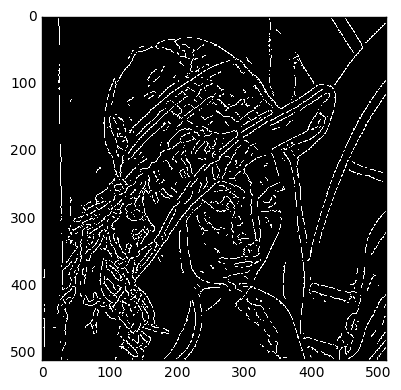

In [161]:
def hysterese(lowThreshold, highThreshold):
    cannyImg = np.zeros((height, width))
    
    for y in range(0, height):
        for x in range(0, width):
            if magnitudeImg[y, x] > highThreshold:
                cannyImg[y, x] = 1

                if x > 0:
                    if magnitudeImg[y, x-1] > lowThreshold:
                        cannyImg[y, x-1] = 1

                    if y > 0 and magnitudeImg[y-1, x-1] > lowThreshold:
                        cannyImg[y-1, x-1] = 1

                    if y+1 < rows and magnitudeImg[x-1, y+1] > lowThreshold:
                        cannyImg[y+1, x-1] = 1

                if y > 0:
                    if magnitudeImg[y-1, x] > lowThreshold:
                        cannyImg[y-1, x] = 1

                    if x+1 < cols and magnitudeImg[y-1, x+1] > lowThreshold:
                        cannyImg[y-1, x+1] = 1

                if x+1 < cols:
                    if magnitudeImg[y, x+1] > lowThreshold:
                        cannyImg[y, x+1] = 1

                    if y+1 < rows and magnitudeImg[y+1, x+1] > lowThreshold:
                        cannyImg[y+1, x+1] = 1

                if y+1 < rows and magnitudeImg[y+1, x] > lowThreshold:
                    cannyImg[y+1, x] = 1
                        
    return cannyImg

io.imshow(hysterese(0.02, 0.05))

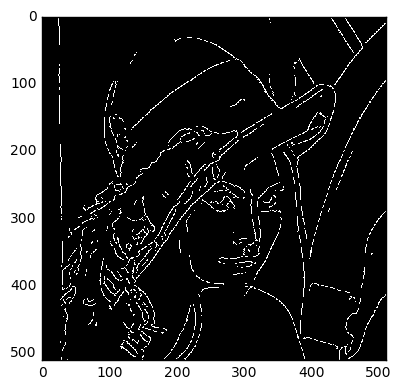

In [162]:
io.imshow(hysterese(0.08, 0.12))

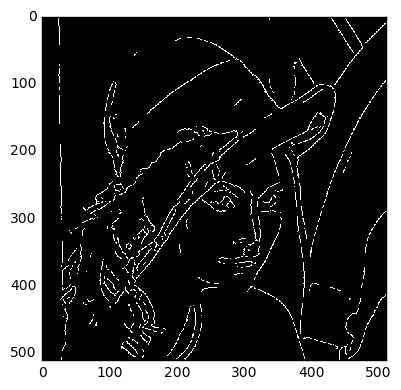

In [163]:
io.imshow(hysterese(0.04, 0.14))